In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns,set()

(<module 'seaborn' from 'C:\\Users\\Harshpreet Singh\\Anacondajupyternb\\lib\\site-packages\\seaborn\\__init__.py'>,
 set())

In [2]:
titanic_data = pd.read_csv('data/titanic_train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


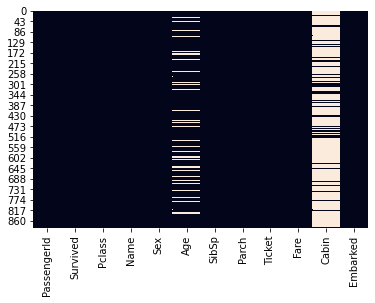

In [4]:
sns.heatmap(titanic_data.isnull(), cbar=False)

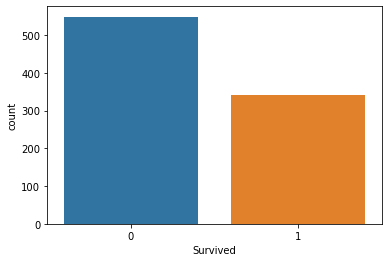

In [5]:
sns.countplot(x='Survived', data=titanic_data)

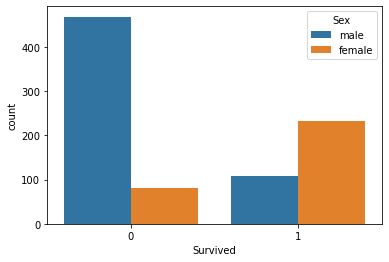

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

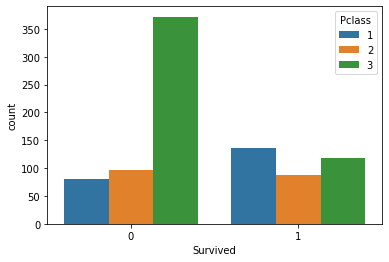

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

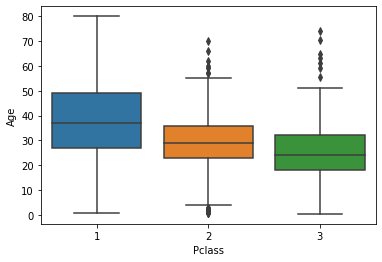

In [8]:
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

In [9]:
def input_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age

In [10]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(input_missing_age, axis = 1)

In [11]:
titanic_data.drop('Cabin', axis=1, inplace = True)
titanic_data.dropna(inplace = True)

In [12]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [13]:
sex_data.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
embarked_data.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
y_data = titanic_data['Survived']
x_data = titanic_data.drop('Survived', axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [19]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
755,756,2,0.67000,1,1,14.5000,1,0,1
391,392,3,21.00000,0,0,7.7958,1,0,1
853,854,1,16.00000,0,1,39.4000,0,0,1
680,681,3,25.14062,0,0,8.1375,0,1,0
868,869,3,25.14062,0,0,9.5000,1,0,1


In [20]:
x_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
190,191,2,32.000000,0,0,13.0000,0,0,1
64,65,1,38.233441,0,0,27.7208,1,0,0
667,668,3,25.140620,0,0,7.7750,1,0,1
490,491,3,25.140620,1,0,19.9667,1,0,1
48,49,3,25.140620,2,0,21.6792,1,0,0


In [21]:
x_test.shape , x_train.shape

((267, 9), (622, 9))

In [22]:
y_train.head()

755    1
391    1
853    1
680    0
868    0
Name: Survived, dtype: int64

In [23]:
y_test.value_counts()

0    177
1     90
Name: Survived, dtype: int64

In [24]:
y_train.value_counts()

0    372
1    250
Name: Survived, dtype: int64

In [25]:
y_train.shape , y_test.shape

((622,), (267,))

In [26]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [27]:
import warnings
warnings.filterwarnings('ignore')
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

In [28]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [29]:
survived = pd.DataFrame(y_test)
prediction = pd.DataFrame(y_pred , columns=['Predicted'])

In [30]:
prediction.head()

,Predicted
0,1
1,0
2,0
3,0
4,0


In [31]:
survived.head()

,Survived
190,1
64,0
667,0
490,0
48,0


In [32]:
solution = pd.DataFrame({ 'PassengerId': x_test['PassengerId'],
                            'Survived': y_test,
                            'Predicted': y_pred})

In [33]:
solution.head()

,PassengerId,Survived,Predicted
190,191,1,1
64,65,0,0
667,668,0,0
490,491,0,0
48,49,0,0


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE = ',rmse)

RMSE =  0.47007848575693784
